# <h1><center>*Predicting The Quality of Wine*</center></h1>

# Goals:

 - Identify what drives wine quality
 - Build a model to best predict wine quality
 ___

# Imports

In [1]:
import pandas as pd
import numpy as np

import acquire as a
import prepare as p
import explore as e
import modeling as m

import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt 

import warnings
warnings.filterwarnings("ignore")

---------------------------------------------------------------------------------------------------------------

# Acquire

 - Data acquired through data.world
 - Wrote a function in my acquire.py file to read csv to a dataframe
 - It contained 6497 rows and 13 columns before cleaning
 - Each row represents a different wine 
 - Each column represents a component of the wine 
 __________

# Prepare

 - Combined both Red and White wine CSVs together
 - Checked for nulls in the data (none were present)
 - Checked that column data types were appropriate
 - Renamed columns/edited column names
 - Created dummy variables for categorical variables
 - Added dummy variables to dataset
 - Split data into train, validate and test (approx. 70/15/15) 
 _____

# Data Dictionary

| Target Variable |     Definition     |
| --------------- | ------------------ |
|      Quality      | Score of wine, scale between 0 - 10  |

| Feature  | Definition |
| ------------- | ------------- |
| Fixed acidity | Measures the level of acidity that doesn't change with storage or wine aging |
| Volatile acidity | Measures the amount of acetic acid in wine, responsible for vinegar-like smell  |
| Citric acid | Measures the amount of citric acid in wine, provides fresh and sour taste |
| Residual sugar | Measures the amount of residual sugar in wine, affects the wine's sweetness |
| Chlorides | Measures the amount of chloride ions in wine, contributes to wine's saltiness |
| Free sulfur dioxide | Measures the amount of free SO2 in wine, acts as a preservative | 
| Total sulfur dioxide | Measures the combined amount of free and bound SO2 in wine |
| Density | Measures the weight per unit volume of wine, affects wine's body and mouthfeel |
| pH | Measures the acidity level of wine, affects wine's taste and stability |
| Sulphates | Measures the amount of sulfur dioxide in wine, contributes to wine's preservation and taste |
| Alcohol | Measures the percentage of alcohol by volume in wine, affects wine's strength and flavor |


_____

# A brief look at the data

In [2]:
# acquiring and cleaning the data
df = a.get_wine_data()
df = p.clean_wine_data(df)

# splitting data into train, validate, and test
train, validate, test = p.train_val_test(df)

In [3]:
#displaying all columns and getting first 5 rows
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
2293,7.6,0.290,0.58,17.50,0.041,51.0,225.0,0.9997,3.16,0.66,9.5,6,white
731,8.9,0.875,0.13,3.45,0.088,4.0,14.0,0.9994,3.44,0.52,11.5,5,red
2958,6.5,0.190,0.32,1.40,0.040,31.0,132.0,0.9922,3.36,0.54,10.8,7,white
6396,5.7,0.330,0.32,1.40,0.043,28.0,93.0,0.9897,3.31,0.50,12.3,6,white
2652,9.4,0.290,0.55,2.20,0.050,17.0,119.0,0.9962,3.12,0.69,10.3,4,white


# A summary of the data

In [4]:
# a look at our column names, data types, and null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4547 entries, 2293 to 4271
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4547 non-null   float64
 1   volatile_acidity      4547 non-null   float64
 2   citric_acid           4547 non-null   float64
 3   residual_sugar        4547 non-null   float64
 4   chlorides             4547 non-null   float64
 5   free_sulfur_dioxide   4547 non-null   float64
 6   total_sulfur_dioxide  4547 non-null   float64
 7   density               4547 non-null   float64
 8   ph                    4547 non-null   float64
 9   sulphates             4547 non-null   float64
 10  alcohol               4547 non-null   float64
 11  quality               4547 non-null   int64  
 12  type                  4547 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.3+ KB


# Explore

### *1. Do red or white wines have a higher quality score?*

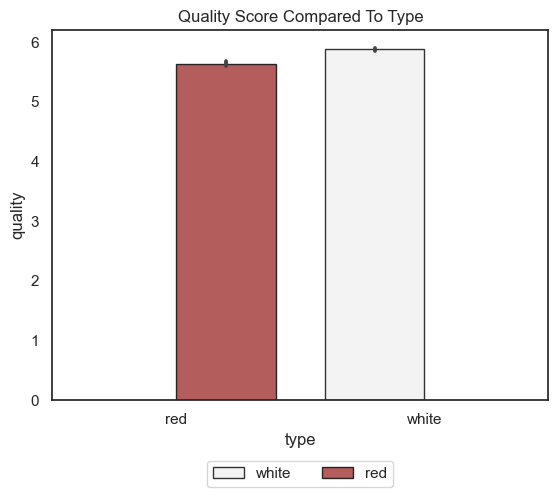

In [5]:
# a bar plot showing us type of wine compared to quality score
e.barplot(df, 'type', 'quality')

**Takeaways**

- From the bar chart there seems to be a little difference between quality in the different types of wine, but its unclear

**Ran a $chi^2$ test to evaluate if there is significance of dependency between  type and quality** <br>

$H_0$: Quality is not dependent on type of wine.

$H_a$: Quality is dependent on type of wine.

Confidence Interval 95% <br>
𝜶 = .05


In [6]:
e.chi_test('type', df)

We reject the null hypothesis.
chi² = 116.543
p = 8.66e-23


**Takeaways**

**- After running a $chi^2$ test we reject the null hypothesis, meaning quality is dependent on the type of wine**

_____

### *2. Does alcohol impact quality positively or negatively?*

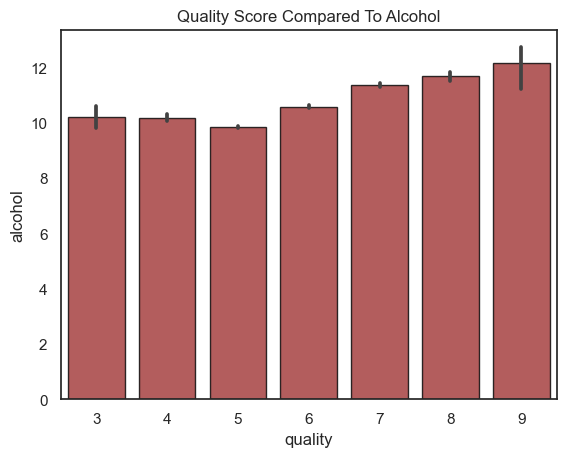

In [7]:
#a bar chart showing us a comparison of quality and alcohol
e.barplot2(df, 'quality' ,'alcohol')

**Takeaways**

**- It seems like quality of the wine increases as alcohol increases as well.**


________

### *3. Does density affect the quality of the wine?*

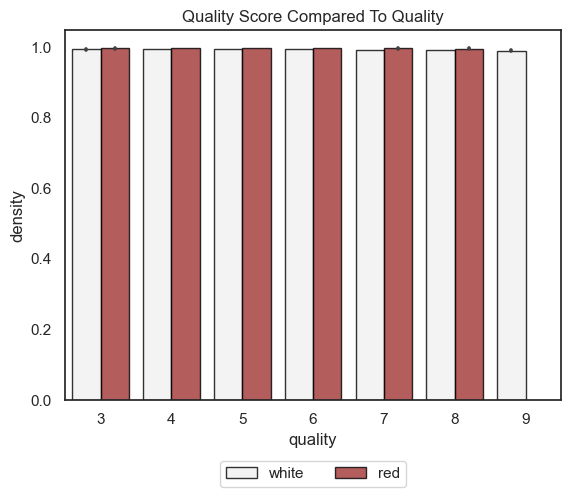

In [8]:
# a bar plot comparing quality to density 
e.barplot(train, 'quality', 'density')

**Takeaways**

- When we graph we are not able to see the affects that density has on the quality of wine.
  
**Ran a 2 Sample T test to show that density does affect the quality of wine**** <br>

$H_o$: Density does not affect the quality of wine.<br>
$H_a$: Density does affect the quality of wine.

Confidence interval of 95%<br>
Alpha is .05


In [9]:
e.qual_den(train)

Are we able to reject the Null Hypothesis?: True
t = -372.878
p-value = 0.0


**Takeaways**

**- Based on the stats test, we are able to see that density does affect the quality of wine.**

_____

### *4. Does PH significantly affect each wine differently?*


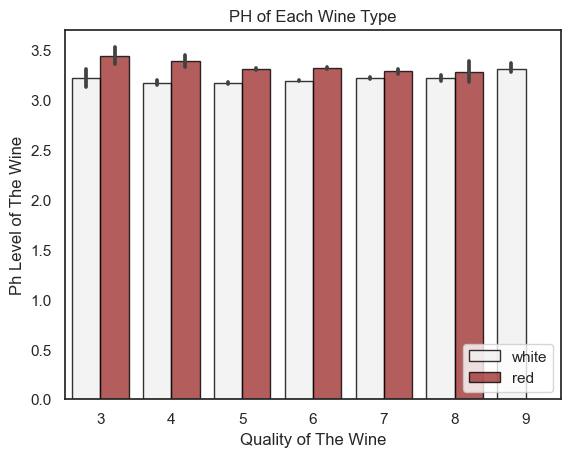

In [10]:
# a bar plot demostrating ph and wine type with quality 
e.ph_quality(train)

**Takeaways**

**- Based on the graph, we can infer that pH does not have a great affect on the each Type of wine and its Quality.**

### Feauture Engineering

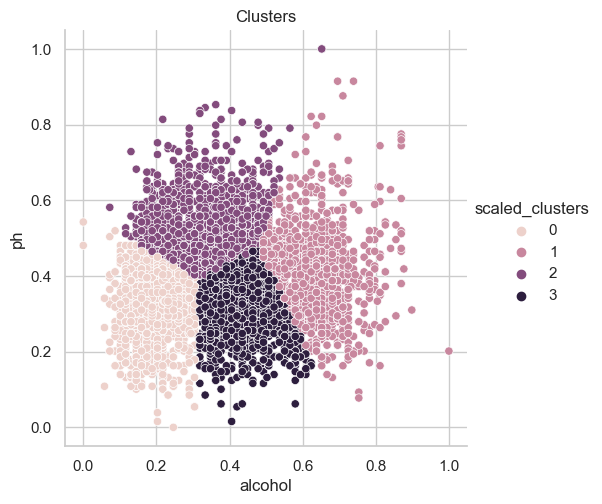

In [11]:
# calling a function to perform a cluster on our data
e.cluster_relplot(df, 'alcohol', 'ph')

**Takeaways**

- Looks like as alcohol increases and PH a new cluster is made

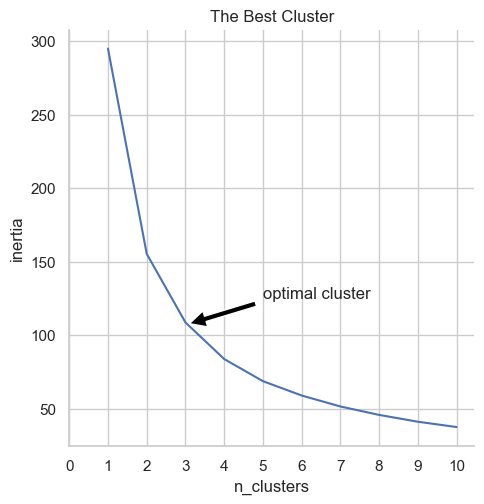

In [12]:
# graphing a function to get the best cluster number
e.best_cluster(df, 'alcohol', 'ph')

**Takeaways**

- According to our chart the best optimal cluster is 3

# Exploration Summary

**- Type of wine (red or white), alcohol, and density were found to be features that affect the wine quality**<br>
**- Type, alcohol, density and cluster will be added for the modeling phase<br>**
**- Type and alcohol seem to have the strongest influence.**
 
 ------

# Modeling 

- Goal is to minimize RMSE, so this will be my evaluation metric
- Ran 3 models including a Linear Regression , Tweedie, and a Polynomial 
- Before modeling scaled data and split
- We evaluated the models on train and validate data 
- The best performing model then was evaluated on test data subset

In [13]:
# combining cluster and merging to original df
df = m.combined_df(df, 'alcohol', 'ph')

In [14]:
# splitting data into train, validate, and test with new column 
train, validate, test = p.train_val_test(df)

In [15]:
# wrote a function to scale train, validate, and test data subsets
train_scaled, validate_scaled, test_scaled = m.mvp_scaled_data(train, validate, test)

In [16]:
# looking at one line of data in our scaled data
train_scaled.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,scaled_clusters
2293,0.31405,0.14,0.349398,0.259202,0.053156,0.173611,0.504608,0.242722,0.330709,0.247191,0.217391,6,white,0


In [17]:
# calling a function we wrote in our modeling.py to split my data in to X/y train, validate, test
X_train, y_train, X_validate,y_validate, X_test, y_test = m.splitting_subsets(train, train_scaled, validate_scaled, test_scaled)

In [18]:
# a look to 1st observation of our scaled, split, train subset
X_train.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,type_red,type_white,scaled_clusters_0,scaled_clusters_1,scaled_clusters_2,scaled_clusters_3
2293,0.31405,0.14,0.349398,0.259202,0.053156,0.173611,0.504608,0.242722,0.330709,0.247191,0.217391,0,1,1,0,0,0


In [23]:
print(f'baseline_rmse = {m.baseline(y_train):.5f}')

baseline_rmse = 0.87090


In [20]:
# called our function that in our modeling.py to demostrate the 3 best models and the baseline
# this includes the train rmse, validate rmse, and their difference 

m.best_models(X_train, y_train, X_validate, y_validate)

,model,train_rmse,validate_rmse,difference
0,linear_poly,0.721184,0.782887,-0.061702
1,linear,0.732087,0.750386,-0.018299
2,tweedie,0.794486,0.809016,-0.014530
3,baseline,0.870897,0.870897,0.000000


### Modeling Summary & Evaluation 

**The best performing model is the linear model, so we tested the model with the test data**

In [21]:
# this is the best model and ran the test data on it
m.best_model(X_train, y_train, X_validate, y_validate, X_test, y_test)

,model,train_rmse,validate_rmse,difference,test_rmse
1,linear,0.732087,0.750386,-0.018299,0.789499


------

<div class="alert alert-info">
    <header>
    <h2>Conclusions:</h2>    
</header>    
<dt>
    
Wine quality predictions were used by minimizing RMSE within our models. Type and alcohol have proven to be the most valuable, but there is still room for improvement.
<br>        
Best Model's performance:

- Our best model reduced the root mean squared error by .13881 compared to the baseline results.(16% better)

- RMSE 0.732087 on in-sample (train), RMSE 0.750386 on out-of-sample data (validate) and RMSE of 0.789499 on the test data.</dt>

<header>
    <h2>Recommendations:</h2>        
</header>      
<dl>
    
- We would recommend using type and alcohol to build models to predict wine quality. 

- We would also recommend collecting more data on what other ingredients were used such as grapes.

<header>
    <h2> Next Steps:</h2>       
</header> 
</dl>
    
- Remove outliers, and explore other features using clustering techniques

- Consider adding different hyperparameters to models for better results.  

</div>